In [1]:
using Revise
using Laplacians
using Pkg
@show Pkg.pathof(Laplacians)
using SparseArrays
using LinearAlgebra

┌ Info: Recompiling stale cache file /Users/rjkyng/.julia/compiled/v1.1/Laplacians/poVbr.ji for Laplacians [6f8e5838-0efe-5de0-80a3-5fb4f8dbb1de]
└ @ Base loading.jl:1184


Pkg.pathof(Laplacians) = "/Users/rjkyng/Dropbox/Repos/Laplacians.jl/src/Laplacians.jl"


In [89]:
s = 3
s1 = s
s2 = s
s3 = s
b1,b2,b3 = 3,3,3
w = 1e6
@time A = ggrid3_checkered(s1,s2,s3,b1,b2,b3,w);

  0.000015 seconds (30 allocations: 8.641 KiB)


In [111]:
x,y,z = ggrid3coords(s1,s2,s3);
@show x[13],y[13],z[13]
@show x[14],y[14],z[14]

(x[13], y[13], z[13]) = (1.0, 2.0, 2.0)
(x[14], y[14], z[14]) = (2.0, 2.0, 2.0)


(2.0, 2.0, 2.0)

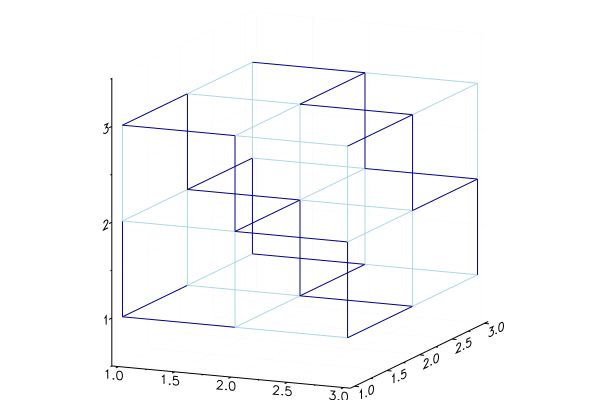

In [106]:
p = plot_graph_weighted(A,x,y,z);

In [66]:
function indexToLinear(x,y,z,xlen,ylen)
    return x+(y-1)*xlen+(z-1)*xlen*ylen
end


indexToLinear (generic function with 1 method)

In [22]:
#=
zsidesize = s1*s2
xsidesize = s2*s3
ysidesize = s1*s3
zside1 = 1:zbot # bot 
zside2 = n-zbot+1:n # top

zside1b = Array{Int64,undef,zsidesize}
for (i,(x,y)) in Base.Iterators.enumerate(Base.product(1:s1,1:s2))
    zside1b[i] = indexToLinear(x,y,1,s1,s2)
end

left = s1+1:s1:n-s1
right = 2*s1:s1:n-1
front = 
back = 
bndry = [bot; top; left; right]
@time int = setdiff(1:n,bndry) # the interior variables (= all - boundary )

@time M = L[int,int]
# remove the rows and colums corresponding to the boundary of the grid
# -- this is because we essentially want to force boundary voltages to be zero

ni = length(int) #this is the remaining variables
=#

In [23]:
Base.Iterators.enumerate(Base.product(1:s1,1:s2))

Base.Iterators.Enumerate{Base.Iterators.ProductIterator{Tuple{UnitRange{Int64},UnitRange{Int64}}}}(Base.Iterators.ProductIterator{Tuple{UnitRange{Int64},UnitRange{Int64}}}((1:3, 1:3)))

In [67]:
n = s1*s2*s3
zsidesize = s1*s2
xsidesize = s2*s3
ysidesize = s1*s3

9

In [131]:
n = s1*s2*s3
zsidesize = s1*s2
xsidesize = s2*s3
ysidesize = s1*s3
zside1b = 1:zsidesize # bot 
zside2b = n-zsidesize+1:n # top

zside1 = Array{Int64}(undef,zsidesize)
for (i,(x,y)) in Base.Iterators.enumerate(Base.product(1:s1,1:s2))
    zside1[i] = indexToLinear(x,y,1,s1,s2)
end

zside2 = Array{Int64}(undef,zsidesize)
for (i,(x,y)) in Base.Iterators.enumerate(Base.product(1:s1,1:s2))
    zside2[i] = indexToLinear(x,y,s3,s1,s2)
end

xside1 = Array{Int64}(undef,xsidesize)
for (i,(y,z)) in Base.Iterators.enumerate(Base.product(1:s2,1:s3))
#     @show (i,(y,z))
#     if (y == 2 && z == 2)
#         @show z == 2
#         @show indexToLinear(1,y,z,s1,s2)
#     end
    xside1[i] = indexToLinear(1,y,z,s1,s2)
end

xside2 = Array{Int64}(undef,xsidesize)
for (i,(y,z)) in Base.Iterators.enumerate(Base.product(1:s2,1:s3))
    xside2[i] = indexToLinear(s1,y,z,s1,s2)
end

yside1 = Array{Int64}(undef,ysidesize)
for (i,(x,z)) in Base.Iterators.enumerate(Base.product(1:s1,1:s3))
    yside1[i] = indexToLinear(x,1,z,s1,s2)
end

yside2 = Array{Int64}(undef,ysidesize)
for (i,(x,z)) in Base.Iterators.enumerate(Base.product(1:s1,1:s3))
    yside2[i] = indexToLinear(x,s2,z,s1,s2)
end

bndry = [zside1; zside2; xside1; xside2; yside1; yside2];
@time int = setdiff(1:n,bndry)

  0.000032 seconds (27 allocations: 2.898 KiB)


1-element Array{Int64,1}:
 14

In [136]:
setdiff(zside2,zside2b)

0-element Array{Int64,1}

In [137]:
setdiff(zside2b,zside2)

0-element Array{Int64,1}

In [138]:
s = 3
s1 = s
s2 = s
s3 = s
b1,b2,b3 = 3,3,3
w = 1e6
@time A = ggrid3_checkered(s1,s2,s3,b1,b2,b3,w);

  0.000016 seconds (30 allocations: 8.641 KiB)


# again

In [144]:
s = 4
s1 = s
s2 = s
s3 = s
b1,b2,b3 = 3,3,3
w = 1e6
@time A = ggrid3_checkered(s1,s2,s3,b1,b2,b3,w);

  0.000032 seconds (30 allocations: 19.203 KiB)


In [145]:
x,y,z = ggrid3coords(s1,s2,s3);

In [147]:
n = s1*s2*s3
zsidesize = s1*s2
xsidesize = s2*s3
ysidesize = s1*s3
zside1b = 1:zsidesize # bot 
zside2b = n-zsidesize+1:n # top

zside1 = Array{Int64}(undef,zsidesize)
for (i,(x,y)) in Base.Iterators.enumerate(Base.product(1:s1,1:s2))
    zside1[i] = indexToLinear(x,y,1,s1,s2)
end

zside2 = Array{Int64}(undef,zsidesize)
for (i,(x,y)) in Base.Iterators.enumerate(Base.product(1:s1,1:s2))
    zside2[i] = indexToLinear(x,y,s3,s1,s2)
end

xside1 = Array{Int64}(undef,xsidesize)
for (i,(y,z)) in Base.Iterators.enumerate(Base.product(1:s2,1:s3))
#     @show (i,(y,z))
#     if (y == 2 && z == 2)
#         @show z == 2
#         @show indexToLinear(1,y,z,s1,s2)
#     end
    xside1[i] = indexToLinear(1,y,z,s1,s2)
end

xside2 = Array{Int64}(undef,xsidesize)
for (i,(y,z)) in Base.Iterators.enumerate(Base.product(1:s2,1:s3))
    xside2[i] = indexToLinear(s1,y,z,s1,s2)
end

yside1 = Array{Int64}(undef,ysidesize)
for (i,(x,z)) in Base.Iterators.enumerate(Base.product(1:s1,1:s3))
    yside1[i] = indexToLinear(x,1,z,s1,s2)
end

yside2 = Array{Int64}(undef,ysidesize)
for (i,(x,z)) in Base.Iterators.enumerate(Base.product(1:s1,1:s3))
    yside2[i] = indexToLinear(x,s2,z,s1,s2)
end

bndry = [zside1; zside2; xside1; xside2; yside1; yside2];
@time int = setdiff(1:n,bndry)

ni = length(int) #this is the remaining variables
@assert(ni == (s-2)^3)

  0.000027 seconds (27 allocations: 4.414 KiB)


In [148]:
@time L = lap(A) # create the Laplacian
@time M = L[int,int]
# remove the rows and colums corresponding to the boundary of the grid
# -- this is because we essentially want to force boundary voltages to be zero



  0.177127 seconds (175.64 k allocations: 8.903 MiB, 24.02% gc time)
  0.320224 seconds (620.39 k allocations: 30.024 MiB, 3.87% gc time)


8×8 SparseMatrixCSC{Float64,Int64} with 32 stored entries:
  [1, 1]  =  3.0e6
  [2, 1]  =  -1.0
  [3, 1]  =  -1.0
  [5, 1]  =  -1.0
  [1, 2]  =  -1.0
  [2, 2]  =  3.0e6
  [4, 2]  =  -1.0e6
  [6, 2]  =  -1.0e6
  [1, 3]  =  -1.0
  [3, 3]  =  3.0e6
  [4, 3]  =  -1.0e6
  [7, 3]  =  -1.0e6
  ⋮
  [2, 6]  =  -1.0e6
  [5, 6]  =  -1.0e6
  [6, 6]  =  3.0e6
  [8, 6]  =  -1.0
  [3, 7]  =  -1.0e6
  [5, 7]  =  -1.0e6
  [7, 7]  =  3.0e6
  [8, 7]  =  -1.0
  [4, 8]  =  -1.0
  [6, 8]  =  -1.0
  [7, 8]  =  -1.0
  [8, 8]  =  3.0e6

## again again

In [150]:
s = 7
s1 = s
s2 = s
s3 = s
b1,b2,b3 = 3,3,3
w = 1e6
@time A = ggrid3_checkered(s1,s2,s3,b1,b2,b3,w);
x,y,z = ggrid3coords(s1,s2,s3);

n = s1*s2*s3
zsidesize = s1*s2
xsidesize = s2*s3
ysidesize = s1*s3
zside1b = 1:zsidesize # bot 
zside2b = n-zsidesize+1:n # top

zside1 = Array{Int64}(undef,zsidesize)
for (i,(x,y)) in Base.Iterators.enumerate(Base.product(1:s1,1:s2))
    zside1[i] = indexToLinear(x,y,1,s1,s2)
end

zside2 = Array{Int64}(undef,zsidesize)
for (i,(x,y)) in Base.Iterators.enumerate(Base.product(1:s1,1:s2))
    zside2[i] = indexToLinear(x,y,s3,s1,s2)
end

xside1 = Array{Int64}(undef,xsidesize)
for (i,(y,z)) in Base.Iterators.enumerate(Base.product(1:s2,1:s3))
#     @show (i,(y,z))
#     if (y == 2 && z == 2)
#         @show z == 2
#         @show indexToLinear(1,y,z,s1,s2)
#     end
    xside1[i] = indexToLinear(1,y,z,s1,s2)
end

xside2 = Array{Int64}(undef,xsidesize)
for (i,(y,z)) in Base.Iterators.enumerate(Base.product(1:s2,1:s3))
    xside2[i] = indexToLinear(s1,y,z,s1,s2)
end

yside1 = Array{Int64}(undef,ysidesize)
for (i,(x,z)) in Base.Iterators.enumerate(Base.product(1:s1,1:s3))
    yside1[i] = indexToLinear(x,1,z,s1,s2)
end

yside2 = Array{Int64}(undef,ysidesize)
for (i,(x,z)) in Base.Iterators.enumerate(Base.product(1:s1,1:s3))
    yside2[i] = indexToLinear(x,s2,z,s1,s2)
end

bndry = [zside1; zside2; xside1; xside2; yside1; yside2];
@time int = setdiff(1:n,bndry)

ni = length(int) #this is the remaining variables
@assert(ni == (s-2)^3)

@time L = lap(A) # create the Laplacian
@time M = L[int,int]
# remove the rows and colums corresponding to the boundary of the grid
# -- this is because we essentially want to force boundary voltages to be zero



  0.000049 seconds (30 allocations: 105.969 KiB)
  0.000042 seconds (27 allocations: 25.430 KiB)
  0.000026 seconds (16 allocations: 50.281 KiB)
  0.000037 seconds (9 allocations: 15.703 KiB)


125×125 SparseMatrixCSC{Float64,Int64} with 725 stored entries:
  [1  ,   1]  =  6.0e6
  [2  ,   1]  =  -1.0e6
  [6  ,   1]  =  -1.0e6
  [26 ,   1]  =  -1.0e6
  [1  ,   2]  =  -1.0e6
  [2  ,   2]  =  1.00001e6
  [3  ,   2]  =  -1.0
  [7  ,   2]  =  -1.0
  [27 ,   2]  =  -1.0
  [2  ,   3]  =  -1.0
  [3  ,   3]  =  6.0
  [4  ,   3]  =  -1.0
  ⋮
  [122, 123]  =  -1.0
  [123, 123]  =  6.0
  [124, 123]  =  -1.0
  [99 , 124]  =  -1.0e6
  [119, 124]  =  -1.0e6
  [123, 124]  =  -1.0
  [124, 124]  =  5.0e6
  [125, 124]  =  -1.0e6
  [100, 125]  =  -1.0e6
  [120, 125]  =  -1.0e6
  [124, 125]  =  -1.0e6
  [125, 125]  =  6.0e6